In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
from pandas.tseries.offsets import DateOffset

HOME_DIR = "/home/jovyan"
DATA_DIR = os.path.join(HOME_DIR, "arc-sg/data")
OUTPUT_DIR = os.path.join(HOME_DIR, "arc-sg/outputs")

## dump

In [2]:
labs_df_24 = pd.read_csv(os.path.join(HOME_DIR, "arc-sg/outputs", "filtered_labs.csv"))

In [3]:
labs_df_24.columns

Index(['Patient ID', 'Gender', 'Date of Birth', 'Specimen Received Date',
       'Lab Resulted Order Test Description', 'Result Value'],
      dtype='object')

In [4]:
labs_df_24['Patient ID'].unique().shape

(57458,)

In [5]:
cancer_cols = ['Institution Code','Patient ID','Date of Birth','Gender',
               'Nationality','Race','Case No','Diagnosis Code (ICD10)',
               'Diagnosis Description (ICD10)','Diagnosis Date']

In [15]:
diag_df = aggregate_csvs(os.path.join(HOME_DIR, "elpha-data/diagnosis", "*.csv"), pd.DataFrame(), cancer_cols)

In [16]:
diag_df.columns

Index([], dtype='object')

In [17]:
diag_df.shape

(0, 0)

In [18]:
diag_df2 = diag_df.drop_duplicates(subset=['Patient ID', 'Diagnosis Code (ICD10)', 'Diagnosis Date'])

In [19]:
diag_df2.shape

(0, 0)

In [20]:
filtered_diag.to_pickle(os.path.join(DATA_DIR, "lab_diag.pkl"))

NameError: name 'filtered_diag' is not defined

In [21]:
filtered_diag = diag_df2[diag_df2['Patient ID'].isin(labs_df_24['Patient ID'])]

KeyError: 'Patient ID'

In [ ]:
filtered_diag["Patient ID"].unique().shape

In [ ]:
filtered_diag.shape

## Collate 5 years of lab data
Rerun as files are added in batches (space issues)

In [10]:
FIELD = {
    "ID": "Patient ID",
    "RACE": "Race",
    "DOB": "Date of Birth",
    "Nationality": "Nationality",
    "INSTITUTION": "Institution Code",
    "TEST_NAME": "Lab Resulted Order Test Description",
    "RESULT": "Result Value",
    "DATE": "Specimen Received Date" # "Specimen Collection Date",
}

In [11]:
FIELD.values()

dict_values(['Patient ID', 'Race', 'Date of Birth', 'Nationality', 'Institution Code', 'Lab Resulted Order Test Description', 'Result Value', 'Specimen Received Date'])

In [12]:
def aggregate_csvs(input_dir, curr_df = pd.DataFrame(), usecols=None):
    files = glob(input_dir)
    df_list = []
    if usecols:
        df_list = [pd.read_csv(file,engine='python',error_bad_lines=False, usecols=usecols) for file in files]
    else: 
        df_list = [pd.read_csv(file) for file in files]
    df_all  = pd.concat([curr_df, *df_list], ignore_index=True)
    return df_all

In [13]:
input_dir = os.path.join(DATA_DIR, "SGH 2015-2022", "*.csv")
usecols = ['Patient ID','Gender', 'Date of Birth','Specimen Received Date', 'Lab Resulted Order Test Description','Result Value' ] # temporarily
# usecols = FIELD.values()
labs_df = pd.DataFrame()

In [14]:
labs_df = aggregate_csvs(os.path.join(DATA_DIR, "SGH 2015-2022", "*.csv"), labs_df, usecols)

/tmp/ipykernel_1514/1146422198.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_list = [pd.read_csv(file,engine='python',error_bad_lines=False, usecols=usecols) for file in files]
/tmp/ipykernel_1514/1146422198.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_list = [pd.read_csv(file,engine='python',error_bad_lines=False, usecols=usecols) for file in files]
/tmp/ipykernel_1514/1146422198.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_list = [pd.read_csv(file,engine='python',error_bad_lines=False, usecols=usecols) for file in files]
/tmp/ipykernel_1514/1146422198.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_line

In [17]:
labs_df.shape

(10355621, 6)

In [19]:
labs_df

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
0,7f7a4ad5417e81870f61,FEMALE,1948-05-01,2015-11-07,CA 19-9,120
1,7f7a4ad5417e81870f61,FEMALE,1948-05-01,2015-11-07,BICARBONATE,22.6
2,7f7a4ad5417e81870f61,FEMALE,1948-05-01,2015-11-07,CHLORIDE,101
3,7f7a4ad5417e81870f61,FEMALE,1948-05-01,2015-11-07,CREATININE,61
4,7f7a4ad5417e81870f61,FEMALE,1948-05-01,2015-11-07,GLUCOSE,7.6
...,...,...,...,...,...,...
10355616,765a99be495ac498b24e,FEMALE,1952-12-01,2015-09-18,"BILIRUBIN,TOTAL",83
10355617,765a99be495ac498b24e,FEMALE,1952-12-01,2015-09-18,GAMMA GT,530
10355618,765a99be495ac498b24e,FEMALE,1952-12-01,2015-09-18,"PROTEIN,TOTAL",71
10355619,765a99be495ac498b24e,FEMALE,1952-12-01,2015-09-18,APTT,29.5


In [54]:
print(if: (labs_df['Lab Resulted Order Test Description'].value_counts()>1000)==True)

SyntaxError: invalid syntax (710395197.py, line 1)

In [9]:
labs_path = os.path.join(OUTPUT_DIR, "labs_2015-2022(2).pkl")
labs_df.to_pickle(labs_path)

OSError: [Errno 122] Disk quota exceeded

# Lab test exploration

In [10]:
glucose_mask = labs_df[FIELD["TEST_NAME"]].str.contains("glucose", case=False, na=False) & labs_df[FIELD["TEST_NAME"]].str.contains("fasting", case=False, na=False)

In [11]:
ldl_mask = labs_df[FIELD["TEST_NAME"]].str.contains("ldl", case=False, na=False) # 

In [12]:
fasting_glucose = labs_df[glucose_mask]

In [13]:
fasting_glucose[FIELD["TEST_NAME"]].unique()

array(['GLUCOSE,PLASMA FASTING', 'GLUCOSE FASTING'], dtype=object)

In [14]:
ldl = labs_df[ldl_mask]

In [15]:
ldl[FIELD["TEST_NAME"]].unique()

array(['LDL-CHOLESTEROL,CALCULATED', 'LDL-CHOLESTEROL,DIRECT',
       'CHOLESTEROL,TG,HDL,LDL'], dtype=object)

# Lab test filtering

In [16]:
test = ldl[ldl[FIELD["TEST_NAME"]]=="CHOLESTEROL,TG,HDL,LDL"]
test[FIELD["RESULT"]].unique()

array([nan], dtype=object)

In [17]:
labs_df[labs_df[FIELD["TEST_NAME"]].str.contains("triglycerides", case=False, na=False)]

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
2933,b8a621be8e2321d4b13f,MALE,1966-06-01,2018-08-20,TRIGLYCERIDES,2.38
3180,8c34af394944e18ccfe0,MALE,1975-06-01,2018-08-29,TRIGLYCERIDES,1.30
3228,b0aa9d226b543c192f09,MALE,1973-04-01,2018-08-07,TRIGLYCERIDES,1.21
3999,9c5441c3c6af0e8dfff9,MALE,1943-03-01,2018-08-21,TRIGLYCERIDES,2.27
4184,249d347251235dbd4cc6,FEMALE,1996-09-01,2018-08-29,TRIGLYCERIDES,0.73
...,...,...,...,...,...,...
24019520,58427894b2eb6d408b35,FEMALE,1933-01-01,2021-07-17,TRIGLYCERIDES,2.48
24019831,06088ef1c226d9d6ed8a,FEMALE,1943-11-01,2021-08-01,TRIGLYCERIDES,0.59
24022651,323636068c5e7355ce6d,FEMALE,1950-05-01,2021-07-29,TRIGLYCERIDES,0.84
24023025,70ccd62b72641e2221d6,MALE,1956-12-01,2021-07-13,TRIGLYCERIDES,2.53


In [18]:
labs_path = os.path.join(OUTPUT_DIR, "labs_2015-2022.pkl")
labs_df = pd.read_pickle(labs_path)

In [19]:
glucose_mask = labs_df[FIELD["TEST_NAME"]].str.contains("glucose", case=False, na=False) & labs_df[FIELD["TEST_NAME"]].str.contains("fasting", case=False, na=False)
other_tests_mask = labs_df[FIELD["TEST_NAME"]].str.contains('HBA1C|TRIGLYCERIDES|LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT', case=False, na=False)

In [20]:
filtered_labs_df = labs_df
filtered_labs_df['Lab Resulted Order Test Description'] = labs_df['Lab Resulted Order Test Description'].str.replace('GLUCOSE,PLASMA FASTING', 'GLUCOSE FASTING', case=False, regex=True)
filtered_labs_df = filtered_labs_df[filtered_labs_df['Lab Resulted Order Test Description'].str.contains('HBA1C|TRIGLYCERIDES|LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT|GLUCOSE FASTING', case=False, na=False)]

In [21]:
##converting all LDL labels to LAD-CHOLESTEROL
filtered_labs_df['Lab Resulted Order Test Description'] = filtered_labs_df['Lab Resulted Order Test Description'].str.replace('LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT', 'LDL-CHOLESTEROL', case=False,regex=True)
filtered_labs_df

/tmp/ipykernel_911/2906201204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_labs_df['Lab Resulted Order Test Description'] = filtered_labs_df['Lab Resulted Order Test Description'].str.replace('LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT', 'LDL-CHOLESTEROL', case=False,regex=True)


,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
1849,19b1539322147af94e95,FEMALE,1926-03-01,2015-11-23,HBA1C,7.0
2181,c1926d2f0b958145121e,MALE,1965-10-01,2015-11-03,HBA1C,6.2
2230,dff6f178b1dc7a7240d9,FEMALE,1971-06-01,2015-11-27,HBA1C,6.1
2502,1c12adf8538a182f2d24,MALE,1970-01-01,2015-11-25,GLUCOSE FASTING,9.3
2563,f5e124aa01edd126ac74,MALE,1960-10-01,2015-11-24,HBA1C,10.3
...,...,...,...,...,...,...
42295175,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,HBA1C IFCC,41
42295178,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,LDL-CHOLESTEROL,2.59
42295179,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,TRIGLYCERIDES,1.96
42295294,75912433644a57c99679,FEMALE,1939-07-01,2022-09-09,HBA1C,8.1


In [22]:
filtered_labs_df.to_csv(os.path.join(OUTPUT_DIR, "filtered_labs.csv"), index=False)

OSError: [Errno 122] Disk quota exceeded

In [23]:
filtered_labs_df['Lab Resulted Order Test Description'].unique

<bound method Series.unique of 1849                  HBA1C
2181                  HBA1C
2230                  HBA1C
2502        GLUCOSE FASTING
2563                  HBA1C
                 ...       
42295175         HBA1C IFCC
42295178    LDL-CHOLESTEROL
42295179      TRIGLYCERIDES
42295294              HBA1C
42295295         HBA1C IFCC
Name: Lab Resulted Order Test Description, Length: 191137, dtype: object>

# Finalising HbA1C and Triglyceride data

In [24]:
filtered_labs_df = pd.read_csv(os.path.join(OUTPUT_DIR, "filtered_labs.csv"))


EmptyDataError: No columns to parse from file

In [25]:
filtered_labs_df[FIELD["DATE"]] = pd.to_datetime(filtered_labs_df[FIELD["DATE"]])

/tmp/ipykernel_911/710102097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_labs_df[FIELD["DATE"]] = pd.to_datetime(filtered_labs_df[FIELD["DATE"]])


In [26]:
filtered_labs_df[FIELD["TEST_NAME"]].unique()

array(['HBA1C', 'GLUCOSE FASTING', 'LDL-CHOLESTEROL', 'TRIGLYCERIDES',
       'TRIGLYCERIDES,FLUID', 'TRIGLYCERIDES,URINE', 'HBA1C IFCC',
       'HBA1c, blood (dual reporting)'], dtype=object)

In [27]:
filtered_labs_df = filtered_labs_df[~filtered_labs_df['Lab Resulted Order Test Description'].str.contains('TRIGLYCERIDES,FLUID | TRIGLYCERIDES,URINE', case=False, na=False)]

In [28]:
filtered_labs_df['Lab Resulted Order Test Description'].unique()

array(['HBA1C', 'GLUCOSE FASTING', 'LDL-CHOLESTEROL', 'TRIGLYCERIDES',
       'TRIGLYCERIDES,FLUID', 'TRIGLYCERIDES,URINE', 'HBA1C IFCC',
       'HBA1c, blood (dual reporting)'], dtype=object)

# Convert HbA1C IFCC values into percentage values

In [29]:
filtered_labs_df['Result Value']=pd.to_numeric(filtered_labs_df['Result Value'], errors='coerce')
for index, value in filtered_labs_df['Lab Resulted Order Test Description'].items():
    if value == 'HBA1C IFCC':
        filtered_labs_df.at[index, 'Result Value'] = 0.09148* filtered_labs_df.at[index, 'Result Value']+ 2.152
        filtered_labs_df.at[index, 'Lab Resulted Order Test Description'] = 'HBA1C'
        
filtered_labs_df

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
1849,19b1539322147af94e95,FEMALE,1926-03-01,2015-11-23,HBA1C,7.00000
2181,c1926d2f0b958145121e,MALE,1965-10-01,2015-11-03,HBA1C,6.20000
2230,dff6f178b1dc7a7240d9,FEMALE,1971-06-01,2015-11-27,HBA1C,6.10000
2502,1c12adf8538a182f2d24,MALE,1970-01-01,2015-11-25,GLUCOSE FASTING,9.30000
2563,f5e124aa01edd126ac74,MALE,1960-10-01,2015-11-24,HBA1C,10.30000
...,...,...,...,...,...,...
42295175,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,HBA1C,5.90268
42295178,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,LDL-CHOLESTEROL,2.59000
42295179,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,TRIGLYCERIDES,1.96000
42295294,75912433644a57c99679,FEMALE,1939-07-01,2022-09-09,HBA1C,8.10000


In [30]:
dff = filtered_labs_df[filtered_labs_df['Lab Resulted Order Test Description']=='HBA1c, blood (dual reporting)']
dff

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
31297457,fa459b06e8b1aa3ee756,MALE,1995-05-01,2020-06-02,"HBA1c, blood (dual reporting)",NaN
31323077,c13d5a1581a49e20d93e,FEMALE,1979-06-01,2020-06-30,"HBA1c, blood (dual reporting)",NaN
31493773,e276bf2aa93b2b10fed7,MALE,1954-10-01,2020-11-03,"HBA1c, blood (dual reporting)",NaN
31527720,611a247fac3331c131e7,FEMALE,1939-10-01,2021-01-02,"HBA1c, blood (dual reporting)",NaN
31541293,efe80c62e33e89d79d1b,FEMALE,1994-07-01,2020-12-14,"HBA1c, blood (dual reporting)",NaN
...,...,...,...,...,...,...
42018146,36d613ca1aef17d8b2ba,MALE,1953-05-01,2022-07-30,"HBA1c, blood (dual reporting)",NaN
42033091,1636a78621c4350fa7df,FEMALE,1940-09-01,2022-07-05,"HBA1c, blood (dual reporting)",NaN
42066873,4e9fd2f4fe0c5e8b6cb7,MALE,1953-01-01,2022-07-28,"HBA1c, blood (dual reporting)",NaN
42129893,2a567a0b99b2ce479d36,MALE,1951-07-01,2022-07-20,"HBA1c, blood (dual reporting)",NaN


# Drop rows with 'TRIGLYCERIDES,FLUID', 'TRIGLYCERIDES,URINE', 'HBA1c, blood (dual reporting)''

In [31]:
filtered_labs_df = filtered_labs_df[~filtered_labs_df['Lab Resulted Order Test Description'].isin (['TRIGLYCERIDES,FLUID' , 'TRIGLYCERIDES,URINE', 'HBA1c, blood (dual reporting)'])]
filtered_labs_df

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
1849,19b1539322147af94e95,FEMALE,1926-03-01,2015-11-23,HBA1C,7.00000
2181,c1926d2f0b958145121e,MALE,1965-10-01,2015-11-03,HBA1C,6.20000
2230,dff6f178b1dc7a7240d9,FEMALE,1971-06-01,2015-11-27,HBA1C,6.10000
2502,1c12adf8538a182f2d24,MALE,1970-01-01,2015-11-25,GLUCOSE FASTING,9.30000
2563,f5e124aa01edd126ac74,MALE,1960-10-01,2015-11-24,HBA1C,10.30000
...,...,...,...,...,...,...
42295175,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,HBA1C,5.90268
42295178,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,LDL-CHOLESTEROL,2.59000
42295179,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,TRIGLYCERIDES,1.96000
42295294,75912433644a57c99679,FEMALE,1939-07-01,2022-09-09,HBA1C,8.10000


# Checking for Null values

In [33]:
num_rows_with_nulls = filtered_labs_df[filtered_labs_df.isnull().any(axis=1)]
num_rows_with_nulls

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
132622,efcbf82ff31dd8b001b4,MALE,1932-01-01,2015-11-24,HBA1C,NaN
159666,8d1323150f11b3cd06e6,MALE,1949-03-01,2015-11-06,HBA1C,NaN
282911,2eebe6747c4953fb0e78,MALE,1935-05-01,2015-11-24,GLUCOSE FASTING,NaN
306246,a86bbd0a3730df48ee83,MALE,1956-11-01,2016-01-26,HBA1C,NaN
315587,02882d8d715efa4c0712,FEMALE,1955-11-01,2015-12-18,GLUCOSE FASTING,NaN
...,...,...,...,...,...,...
42151771,e3c099617ca2b9841d96,FEMALE,1978-01-01,2022-09-16,LDL-CHOLESTEROL,NaN
42151773,e3c099617ca2b9841d96,FEMALE,1978-01-01,2022-09-16,TRIGLYCERIDES,NaN
42202748,34df1e14b5d4a0547345,MALE,1950-05-01,2022-11-10,HBA1C,NaN
42202749,34df1e14b5d4a0547345,MALE,1950-05-01,2022-11-10,HBA1C,NaN


In [34]:
filtered_labs_df=filtered_labs_df.dropna()

## Counting number of tests for within start (DM dx date) and end (Cancer dx date)

In [ ]:
'''tests = {
    "Fasting Glucose": "glucose",
    "HbA1c": "hba1c",
    "Triglycerides": "triglycerides",
    "LDL": "ldl"
}'''

In [ ]:
'''def get_DM_dx(df):
    # Determine if currently has diabetes
    is_diabetic = True
    
    # Determine if there are values to be excluded if there is a DM date within the lab values
    DM_dx_dt = df[FIELD["DATE"]].iloc[0]
    return is_diabetic, DM_dx_dt'''

In [ ]:
'''def get_cancer_dx(df):
    cancers = []
    dts = []
    return cancers, dts'''

In [ ]:
'''def agg_pt_details(grp):
    grp = grp.sort_values(by=FIELD["DATE"])
    # Initialise dict
    result = {"meets_criteria": True, 
              "CANCER": [],
              "CANCER Date": []}
    for key in tests:
        result.update({key: [], key + " Dates": []})
    
    # 01 Check for diabetes, return if no diabetes
    
    is_diabetic, DM_dx_dt = get_DM_dx(grp)
    if is_diabetic is False:
        result["meets_criteria"] = False
        return pd.Series(result)

    # 02 Check for cancer
    
    cancers, cancer_dts = get_cancer_dx(grp)
    earliest_cancer_dt = None
    if (len(cancer_dts) > 0):
        earliest_cancer_dt = sorted(cancer_dt)[0]
 
    # 03 Extract tests within given window
    
    date_mask = pd.Series(True, index=grp.index)
    if DM_dx_dt is not None:
        date_mask &= grp[FIELD["DATE"]] >= pd.to_datetime(DM_dx_dt)
    if earliest_cancer_dt is not None:
        date_mask &= grp[FIELD["DATE"]] >= pd.to_datetime(earliest_cancer_dt) - pd.DateOffset(years=1)
    windowed_grp = grp[date_mask]
    
    for key, val in tests.items():
        test_grp = windowed_grp[grp[FIELD["TEST_NAME"].str.contains(val, case=False, na=False)]]
        result["CANCER"] = test_grp[FIELD["RESULT"]].to_numpy()
        result["CANCER date"] = test_grp[FIELD["DATE"]].to_numpy()
        
    return pd.Series(result)'''

In [35]:
filtered_labs_df

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
1849,19b1539322147af94e95,FEMALE,1926-03-01,2015-11-23,HBA1C,7.00000
2181,c1926d2f0b958145121e,MALE,1965-10-01,2015-11-03,HBA1C,6.20000
2230,dff6f178b1dc7a7240d9,FEMALE,1971-06-01,2015-11-27,HBA1C,6.10000
2502,1c12adf8538a182f2d24,MALE,1970-01-01,2015-11-25,GLUCOSE FASTING,9.30000
2563,f5e124aa01edd126ac74,MALE,1960-10-01,2015-11-24,HBA1C,10.30000
...,...,...,...,...,...,...
42295175,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,HBA1C,5.90268
42295178,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,LDL-CHOLESTEROL,2.59000
42295179,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,TRIGLYCERIDES,1.96000
42295294,75912433644a57c99679,FEMALE,1939-07-01,2022-09-09,HBA1C,8.10000


# Check and drop duplicate rows

In [36]:
duplicates=filtered_labs_df[filtered_labs_df.duplicated()]
duplicates

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
1127297,5146226a04651a2276c8,FEMALE,1937-01-01,2015-06-02,HBA1C,10.20000
1613891,3bc1906bc8bd0b3b11a9,FEMALE,1935-05-01,2015-12-14,HBA1C,7.10000
1716967,b365474c771aac6da0f7,MALE,1964-01-01,2015-12-21,HBA1C,12.10000
1833227,ba59ef7363ff3afe8394,MALE,1971-11-01,2015-12-14,HBA1C,10.20000
2612402,f57e7efbf5a43878bdb4,FEMALE,1951-04-01,2015-03-16,HBA1C,6.50000
...,...,...,...,...,...,...
41314994,82580321624c30f9d7e2,FEMALE,1952-08-01,2022-03-15,HBA1C,11.30000
41720245,3c04325aacb41fbecc55,FEMALE,1947-02-01,2022-12-31,HBA1C,11.30000
41887966,d8bb5e0e8f719baf11e2,MALE,1945-07-01,2022-01-24,HBA1C,7.70000
41887968,d8bb5e0e8f719baf11e2,MALE,1945-07-01,2022-01-24,HBA1C,7.73228


In [38]:
filtered_labs_df=filtered_labs_df.drop_duplicates()
filtered_labs_df

,Patient ID,Gender,Date of Birth,Specimen Received Date,Lab Resulted Order Test Description,Result Value
1849,19b1539322147af94e95,FEMALE,1926-03-01,2015-11-23,HBA1C,7.00000
2181,c1926d2f0b958145121e,MALE,1965-10-01,2015-11-03,HBA1C,6.20000
2230,dff6f178b1dc7a7240d9,FEMALE,1971-06-01,2015-11-27,HBA1C,6.10000
2502,1c12adf8538a182f2d24,MALE,1970-01-01,2015-11-25,GLUCOSE FASTING,9.30000
2563,f5e124aa01edd126ac74,MALE,1960-10-01,2015-11-24,HBA1C,10.30000
...,...,...,...,...,...,...
42295175,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,HBA1C,5.90268
42295178,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,LDL-CHOLESTEROL,2.59000
42295179,dccd5ee362ce9d9a2638,FEMALE,1933-11-01,2022-09-08,TRIGLYCERIDES,1.96000
42295294,75912433644a57c99679,FEMALE,1939-07-01,2022-09-09,HBA1C,8.10000


In [40]:
filtered_labs_df['Lab Resulted Order Test Description'].unique()

array(['HBA1C', 'GLUCOSE FASTING', 'LDL-CHOLESTEROL', 'TRIGLYCERIDES'],
      dtype=object)

In [47]:
filtered_labs_df['Lab Resulted Order Test Description'].value_counts()

HBA1C              75240
TRIGLYCERIDES      49576
LDL-CHOLESTEROL    42171
GLUCOSE FASTING    19374
Name: Lab Resulted Order Test Description, dtype: int64

## Load and filter diagnosis data

In [ ]:
'''usecols = []
diag_df = pd.DataFrame()'''

In [ ]:
'''diag_df = aggregate_csvs(os.path.join(HOME_DIR, "elpha-data/diagnosis", "*.csv"), diag_df, usecols)'''

# WIDE DATA FORMAT

In [41]:
'''grouped_data = filtered_labs_df.groupby(['Patient ID','Gender','Date of Birth','Lab Resulted Order Test Description'])\
.apply(lambda x: list(zip(pd.to_datetime(x['Specimen Received Date']).dt.strftime('%Y-%m-%d'), x['Result Value']))) \
.reset_index(name = 'date_result')
wide_data = grouped_data.pivot(index=['Patient ID','Gender','Date of Birth'], columns = 'Lab Resulted Order Test Description', values = 'date_result')'''

In [99]:
'''for test in ['HBA1C', 'GLUCOSE FASTING', 'LDL-CHOLESTEROL', 'TRIGLYCERIDES']:
    wide_data[f'{test}_name']=test
    wide_data[f'{test}_results'] = wide_data[test]
    wide_data.drop(columns = [test], inplace=True)
for test in ['HBA1C', 'GLUCOSE FASTING', 'LDL-CHOLESTEROL', 'TRIGLYCERIDES']:
    wide_data[f'{test}_results'] = wide_data[f'{test}_results'].apply(
             lambda lst: sorted(lst, key=lambda x: pd.to_datetime(x[0])) if isinstance(lst, list) else lst
    )
wide_data'''

In [103]:
filtered_labs_df['date_result'] = list(zip(filtered_labs_df['Specimen Received Date'], filtered_labs_df['Result Value']))

grouped_df = filtered_labs_df.groupby(['Patient ID','Gender','Date of Birth','Lab Resulted Order Test Description'])['date_result'].agg(list)

final_df = grouped_df.unstack('Lab Resulted Order Test Description').reset_index().rename_axis(None, axis=1)

In [104]:
final_df

,Patient ID,Gender,Date of Birth,GLUCOSE FASTING,HBA1C,LDL-CHOLESTEROL,TRIGLYCERIDES
0,00031c3262ee7a0c2981,FEMALE,1988-05-01,NaN,"[(2015-04-10 00:00:00, 4.7)]","[(2015-04-10 00:00:00, 2.46)]","[(2015-04-10 00:00:00, 0.77)]"
1,0005f0349ba521e1ecb8,MALE,1964-08-01,NaN,NaN,"[(2017-07-14 00:00:00, 2.33)]","[(2017-07-14 00:00:00, 2.88)]"
2,0009747ecbb93007f1bc,MALE,1946-12-01,NaN,"[(2021-04-21 00:00:00, 5.5), (2021-04-21 00:00...",NaN,NaN
3,000b2a238717215130d6,FEMALE,1956-07-01,"[(2018-09-20 00:00:00, 5.6)]","[(2018-09-20 00:00:00, 5.5), (2021-02-14 00:00...","[(2018-09-20 00:00:00, 3.74), (2021-02-14 00:0...","[(2018-09-20 00:00:00, 1.18), (2021-02-14 00:0..."
4,000d121054e0f920e843,FEMALE,1941-11-01,NaN,"[(2019-12-13 00:00:00, 5.4)]",NaN,NaN
...,...,...,...,...,...,...,...
57219,fffc7834b1be0778220d,MALE,1930-12-01,NaN,"[(2015-03-10 00:00:00, 5.8)]","[(2015-03-10 00:00:00, 1.5)]","[(2015-03-10 00:00:00, 0.89)]"
57220,fffdc69ec9e4e8d95613,FEMALE,1937-01-01,"[(2017-11-23 00:00:00, 5.4)]",NaN,"[(2017-11-23 00:00:00, 2.45)]","[(2017-11-23 00:00:00, 0.93)]"
57221,ffff3d1e06e7dbc39130,FEMALE,1962-03-01,"[(2017-09-15 00:00:00, 6.5)]","[(2017-09-14 00:00:00, 4.9)]",NaN,NaN
57222,ffff617649bf7d3b0bb9,MALE,2015-09-01,NaN,NaN,NaN,"[(2015-09-22 00:00:00, 2.69)]"


In [105]:
def unpack_tuples(data_list, idx):
    if isinstance(data_list, list):
        return [item[idx] for item in data_list]
    return np.nan

final_df['HbA1C_test_dates'] = final_df['HBA1C'].apply(lambda x: unpack_tuples(x,0))
final_df['HbA1C_results'] = final_df['HBA1C'].apply(lambda x: unpack_tuples(x,1))

final_df['LDL_test_dates'] = final_df['LDL-CHOLESTEROL'].apply(lambda x: unpack_tuples(x,0))
final_df['LDL_results'] = final_df['LDL-CHOLESTEROL'].apply(lambda x: unpack_tuples(x,1))

final_df['TG_test_dates'] = final_df['TRIGLYCERIDES'].apply(lambda x: unpack_tuples(x,0))
final_df['TG_results'] = final_df['TRIGLYCERIDES'].apply(lambda x: unpack_tuples(x,1))

final_df['FG_test_dates'] = final_df['GLUCOSE FASTING'].apply(lambda x: unpack_tuples(x,0))
final_df['FG_results'] = final_df['GLUCOSE FASTING'].apply(lambda x: unpack_tuples(x,1))

final_df

,Patient ID,Gender,Date of Birth,GLUCOSE FASTING,HBA1C,LDL-CHOLESTEROL,TRIGLYCERIDES,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results
0,00031c3262ee7a0c2981,FEMALE,1988-05-01,NaN,"[(2015-04-10 00:00:00, 4.7)]","[(2015-04-10 00:00:00, 2.46)]","[(2015-04-10 00:00:00, 0.77)]",[2015-04-10 00:00:00],[4.7],[2015-04-10 00:00:00],[2.46],[2015-04-10 00:00:00],[0.77],NaN,NaN
1,0005f0349ba521e1ecb8,MALE,1964-08-01,NaN,NaN,"[(2017-07-14 00:00:00, 2.33)]","[(2017-07-14 00:00:00, 2.88)]",NaN,NaN,[2017-07-14 00:00:00],[2.33],[2017-07-14 00:00:00],[2.88],NaN,NaN
2,0009747ecbb93007f1bc,MALE,1946-12-01,NaN,"[(2021-04-21 00:00:00, 5.5), (2021-04-21 00:00...",NaN,NaN,"[2021-04-21 00:00:00, 2021-04-21 00:00:00]","[5.5, 5.53676]",NaN,NaN,NaN,NaN,NaN,NaN
3,000b2a238717215130d6,FEMALE,1956-07-01,"[(2018-09-20 00:00:00, 5.6)]","[(2018-09-20 00:00:00, 5.5), (2021-02-14 00:00...","[(2018-09-20 00:00:00, 3.74), (2021-02-14 00:0...","[(2018-09-20 00:00:00, 1.18), (2021-02-14 00:0...","[2018-09-20 00:00:00, 2021-02-14 00:00:00, 202...","[5.5, 6.1, 6.085640000000001]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[3.74, 2.09]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[1.18, 1.12]",[2018-09-20 00:00:00],[5.6]
4,000d121054e0f920e843,FEMALE,1941-11-01,NaN,"[(2019-12-13 00:00:00, 5.4)]",NaN,NaN,[2019-12-13 00:00:00],[5.4],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57219,fffc7834b1be0778220d,MALE,1930-12-01,NaN,"[(2015-03-10 00:00:00, 5.8)]","[(2015-03-10 00:00:00, 1.5)]","[(2015-03-10 00:00:00, 0.89)]",[2015-03-10 00:00:00],[5.8],[2015-03-10 00:00:00],[1.5],[2015-03-10 00:00:00],[0.89],NaN,NaN
57220,fffdc69ec9e4e8d95613,FEMALE,1937-01-01,"[(2017-11-23 00:00:00, 5.4)]",NaN,"[(2017-11-23 00:00:00, 2.45)]","[(2017-11-23 00:00:00, 0.93)]",NaN,NaN,[2017-11-23 00:00:00],[2.45],[2017-11-23 00:00:00],[0.93],[2017-11-23 00:00:00],[5.4]
57221,ffff3d1e06e7dbc39130,FEMALE,1962-03-01,"[(2017-09-15 00:00:00, 6.5)]","[(2017-09-14 00:00:00, 4.9)]",NaN,NaN,[2017-09-14 00:00:00],[4.9],NaN,NaN,NaN,NaN,[2017-09-15 00:00:00],[6.5]
57222,ffff617649bf7d3b0bb9,MALE,2015-09-01,NaN,NaN,NaN,"[(2015-09-22 00:00:00, 2.69)]",NaN,NaN,NaN,NaN,[2015-09-22 00:00:00],[2.69],NaN,NaN


In [107]:
ddf = final_df.drop(columns=['GLUCOSE FASTING','HBA1C','LDL-CHOLESTEROL','TRIGLYCERIDES'])
ddf

,Patient ID,Gender,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results
0,00031c3262ee7a0c2981,FEMALE,1988-05-01,[2015-04-10 00:00:00],[4.7],[2015-04-10 00:00:00],[2.46],[2015-04-10 00:00:00],[0.77],NaN,NaN
1,0005f0349ba521e1ecb8,MALE,1964-08-01,NaN,NaN,[2017-07-14 00:00:00],[2.33],[2017-07-14 00:00:00],[2.88],NaN,NaN
2,0009747ecbb93007f1bc,MALE,1946-12-01,"[2021-04-21 00:00:00, 2021-04-21 00:00:00]","[5.5, 5.53676]",NaN,NaN,NaN,NaN,NaN,NaN
3,000b2a238717215130d6,FEMALE,1956-07-01,"[2018-09-20 00:00:00, 2021-02-14 00:00:00, 202...","[5.5, 6.1, 6.085640000000001]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[3.74, 2.09]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[1.18, 1.12]",[2018-09-20 00:00:00],[5.6]
4,000d121054e0f920e843,FEMALE,1941-11-01,[2019-12-13 00:00:00],[5.4],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57219,fffc7834b1be0778220d,MALE,1930-12-01,[2015-03-10 00:00:00],[5.8],[2015-03-10 00:00:00],[1.5],[2015-03-10 00:00:00],[0.89],NaN,NaN
57220,fffdc69ec9e4e8d95613,FEMALE,1937-01-01,NaN,NaN,[2017-11-23 00:00:00],[2.45],[2017-11-23 00:00:00],[0.93],[2017-11-23 00:00:00],[5.4]
57221,ffff3d1e06e7dbc39130,FEMALE,1962-03-01,[2017-09-14 00:00:00],[4.9],NaN,NaN,NaN,NaN,[2017-09-15 00:00:00],[6.5]
57222,ffff617649bf7d3b0bb9,MALE,2015-09-01,NaN,NaN,NaN,NaN,[2015-09-22 00:00:00],[2.69],NaN,NaN


In [110]:
tests_results_available = {'HbA1C_results' : 'Num_HbA1C_results', 'FG_results' : 'Num_FG_results', 'LDL_results' : 'Num_LDL_results', 'TG_results' : 'Num_TG_results'}

for test_col, count_col in tests_results_available.items():
    ddf[count_col] = ddf[test_col].apply(lambda x: len(x) if isinstance(x, list) else 0)
    
ddf

,Patient ID,Gender,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results,Num_HbA1C_results,Num_FG_results,Num_LDL_results,Num_TG_results
0,00031c3262ee7a0c2981,FEMALE,1988-05-01,[2015-04-10 00:00:00],[4.7],[2015-04-10 00:00:00],[2.46],[2015-04-10 00:00:00],[0.77],NaN,NaN,1,0,1,1
1,0005f0349ba521e1ecb8,MALE,1964-08-01,NaN,NaN,[2017-07-14 00:00:00],[2.33],[2017-07-14 00:00:00],[2.88],NaN,NaN,0,0,1,1
2,0009747ecbb93007f1bc,MALE,1946-12-01,"[2021-04-21 00:00:00, 2021-04-21 00:00:00]","[5.5, 5.53676]",NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0
3,000b2a238717215130d6,FEMALE,1956-07-01,"[2018-09-20 00:00:00, 2021-02-14 00:00:00, 202...","[5.5, 6.1, 6.085640000000001]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[3.74, 2.09]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[1.18, 1.12]",[2018-09-20 00:00:00],[5.6],3,1,2,2
4,000d121054e0f920e843,FEMALE,1941-11-01,[2019-12-13 00:00:00],[5.4],NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57219,fffc7834b1be0778220d,MALE,1930-12-01,[2015-03-10 00:00:00],[5.8],[2015-03-10 00:00:00],[1.5],[2015-03-10 00:00:00],[0.89],NaN,NaN,1,0,1,1
57220,fffdc69ec9e4e8d95613,FEMALE,1937-01-01,NaN,NaN,[2017-11-23 00:00:00],[2.45],[2017-11-23 00:00:00],[0.93],[2017-11-23 00:00:00],[5.4],0,1,1,1
57221,ffff3d1e06e7dbc39130,FEMALE,1962-03-01,[2017-09-14 00:00:00],[4.9],NaN,NaN,NaN,NaN,[2017-09-15 00:00:00],[6.5],1,1,0,0
57222,ffff617649bf7d3b0bb9,MALE,2015-09-01,NaN,NaN,NaN,NaN,[2015-09-22 00:00:00],[2.69],NaN,NaN,0,0,0,1


In [115]:
def check_diabetic(result_list):
        if not isinstance (result_list,list):
            return 'Not Diabetic'
        for value in result_list:
            try:
                if float(value) > 6.5:
                    return 'diabetic'
            except:
                continue
        return 'Non-diabetic'

In [117]:
ddf['Diabetic_status'] = ddf['HbA1C_results'].apply(check_diabetic)
ddf

,Patient ID,Gender,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results,Num_HbA1C_results,Num_FG_results,Num_LDL_results,Num_TG_results,Diabetic_status
0,00031c3262ee7a0c2981,FEMALE,1988-05-01,[2015-04-10 00:00:00],[4.7],[2015-04-10 00:00:00],[2.46],[2015-04-10 00:00:00],[0.77],NaN,NaN,1,0,1,1,Non-diabetic
1,0005f0349ba521e1ecb8,MALE,1964-08-01,NaN,NaN,[2017-07-14 00:00:00],[2.33],[2017-07-14 00:00:00],[2.88],NaN,NaN,0,0,1,1,Not Diabetic
2,0009747ecbb93007f1bc,MALE,1946-12-01,"[2021-04-21 00:00:00, 2021-04-21 00:00:00]","[5.5, 5.53676]",NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0,Non-diabetic
3,000b2a238717215130d6,FEMALE,1956-07-01,"[2018-09-20 00:00:00, 2021-02-14 00:00:00, 202...","[5.5, 6.1, 6.085640000000001]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[3.74, 2.09]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[1.18, 1.12]",[2018-09-20 00:00:00],[5.6],3,1,2,2,Non-diabetic
4,000d121054e0f920e843,FEMALE,1941-11-01,[2019-12-13 00:00:00],[5.4],NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,Non-diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57219,fffc7834b1be0778220d,MALE,1930-12-01,[2015-03-10 00:00:00],[5.8],[2015-03-10 00:00:00],[1.5],[2015-03-10 00:00:00],[0.89],NaN,NaN,1,0,1,1,Non-diabetic
57220,fffdc69ec9e4e8d95613,FEMALE,1937-01-01,NaN,NaN,[2017-11-23 00:00:00],[2.45],[2017-11-23 00:00:00],[0.93],[2017-11-23 00:00:00],[5.4],0,1,1,1,Not Diabetic
57221,ffff3d1e06e7dbc39130,FEMALE,1962-03-01,[2017-09-14 00:00:00],[4.9],NaN,NaN,NaN,NaN,[2017-09-15 00:00:00],[6.5],1,1,0,0,Non-diabetic
57222,ffff617649bf7d3b0bb9,MALE,2015-09-01,NaN,NaN,NaN,NaN,[2015-09-22 00:00:00],[2.69],NaN,NaN,0,0,0,1,Not Diabetic


In [ ]:
# wide_data

# Finding date of Diabetus diagnosis

In [ ]:
'''def diabetus_diagnosis_date(results):
    if not isinstance (results, list):
        return pd.NaT
    
    for date,val in results:
        try:
            if float(val) > 6.5:
                return pd.to_datetime(date).date()
        except:
            continue
    return pd.NaT

wide_data['diabetic_diagnosis_date'] = wide_data['HBA1C_results'].apply(diabetus_diagnosis_date)
wide_data'''

# MERGING WITH CANCER DATA

In [119]:
diag_data = pd.read_pickle('/home/jovyan/elpha-data/outputs/diagnosis(2).pkl')

In [120]:
diag_data

,Institution Code,Patient ID,Date of Birth,Gender,Nationality,Race,Diagnosis Code (ICD10),Diagnosis Date
32,KKH,7f7a4ad5417e81870f61,1948-05-01,FEMALE,Sri Lankan,Chinese,C50,2021-07-13
33,KKH,7f7a4ad5417e81870f61,1948-05-01,FEMALE,Sri Lankan,Chinese,C50,2021-07-05
74,KKH,1dc384da0e6d8f1c007e,1962-05-01,FEMALE,Others,Chinese,C50,2021-12-22
75,KKH,1dc384da0e6d8f1c007e,1962-05-01,FEMALE,Others,Chinese,C50,2021-12-22
83,KKH,cf13f171793bc5e6b5ad,1970-12-01,FEMALE,Malaysian,Chinese,C50,2021-11-18
...,...,...,...,...,...,...,...,...
24878952,SGH,4625324208c7f8932429,1944-06-01,MALE,Singapore Citizen,Malay,C18,2019-04-03
24878961,SGH,4625324208c7f8932429,1944-06-01,MALE,Singapore Citizen,Malay,C18,2019-04-18
24879011,SGH,116f63b78c8a38bf394c,1933-06-01,MALE,Singapore Citizen,Chinese,C61,2019-02-04
24879012,SGH,116f63b78c8a38bf394c,1933-06-01,MALE,Singapore Citizen,Chinese,C61,2019-05-02


In [121]:
data_combined = pd.merge(ddf, diag_data[['Patient ID','Diagnosis Code (ICD10)', 'Diagnosis Date']], on='Patient ID', how='left')
data_combined

,Patient ID,Gender,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results,Num_HbA1C_results,Num_FG_results,Num_LDL_results,Num_TG_results,Diabetic_status,Diagnosis Code (ICD10),Diagnosis Date
0,00031c3262ee7a0c2981,FEMALE,1988-05-01,[2015-04-10 00:00:00],[4.7],[2015-04-10 00:00:00],[2.46],[2015-04-10 00:00:00],[0.77],NaN,NaN,1,0,1,1,Non-diabetic,NaN,NaN
1,0005f0349ba521e1ecb8,MALE,1964-08-01,NaN,NaN,[2017-07-14 00:00:00],[2.33],[2017-07-14 00:00:00],[2.88],NaN,NaN,0,0,1,1,Not Diabetic,NaN,NaN
2,0009747ecbb93007f1bc,MALE,1946-12-01,"[2021-04-21 00:00:00, 2021-04-21 00:00:00]","[5.5, 5.53676]",NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0,Non-diabetic,NaN,NaN
3,000b2a238717215130d6,FEMALE,1956-07-01,"[2018-09-20 00:00:00, 2021-02-14 00:00:00, 202...","[5.5, 6.1, 6.085640000000001]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[3.74, 2.09]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[1.18, 1.12]",[2018-09-20 00:00:00],[5.6],3,1,2,2,Non-diabetic,C18,2021-02-14
4,000b2a238717215130d6,FEMALE,1956-07-01,"[2018-09-20 00:00:00, 2021-02-14 00:00:00, 202...","[5.5, 6.1, 6.085640000000001]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[3.74, 2.09]","[2018-09-20 00:00:00, 2021-02-14 00:00:00]","[1.18, 1.12]",[2018-09-20 00:00:00],[5.6],3,1,2,2,Non-diabetic,C18,2021-02-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220288,fffdc69ec9e4e8d95613,FEMALE,1937-01-01,NaN,NaN,[2017-11-23 00:00:00],[2.45],[2017-11-23 00:00:00],[0.93],[2017-11-23 00:00:00],[5.4],0,1,1,1,Not Diabetic,C18,2017-12-27
220289,fffdc69ec9e4e8d95613,FEMALE,1937-01-01,NaN,NaN,[2017-11-23 00:00:00],[2.45],[2017-11-23 00:00:00],[0.93],[2017-11-23 00:00:00],[5.4],0,1,1,1,Not Diabetic,C18,2018-01-17
220290,ffff3d1e06e7dbc39130,FEMALE,1962-03-01,[2017-09-14 00:00:00],[4.9],NaN,NaN,NaN,NaN,[2017-09-15 00:00:00],[6.5],1,1,0,0,Non-diabetic,NaN,NaN
220291,ffff617649bf7d3b0bb9,MALE,2015-09-01,NaN,NaN,NaN,NaN,[2015-09-22 00:00:00],[2.69],NaN,NaN,0,0,0,1,Not Diabetic,NaN,NaN


# save as a pickle file as 'combined_data'|

In [127]:
data_path = os.path.join(OUTPUT_DIR, "combined_data.pkl")
data_combined.to_pickle(data_path, )

In [122]:
def filter_before_diagnosis(results, diabetus_diagnosis_date, cancer_date):
    if not isinstance(results, list) or pd.isna(diabetus_diagnosis_date):
        return results
    
    if isinstance(diabetus_diagnosis_date, pd.Timestamp):
        diabetus_diagnosis_date = diabetus_diagnosis_date.date()
    if isinstance(cancer_date, pd.Timestamp):
        cancer_date = cancer_date.date()
        
    filtered=[]
    
    for d,v in results:
        try:
            test_date = pd.to_datetime(d).date()
            
            if(pd.notna(diabetus_diagnosis_date) and test_date < diabetic_diagnosis_date):
                continue
            if (pd.notna(cancer_date) and test_date >= cancer_date - timedelta(days=365)):
                continue
            filtered.append((d,v))
        except:
            continue
        
    return filtered



In [123]:
tests_cols = ['HBA1C_results', 'GLUCOSE FASTING_results', 'LDL-CHOLESTEROL_results', 'TRIGLYCERIDES_results']

for col in tests_cols:
    data_combined[col] = data_combined.apply(
        lambda row: filter_before_diagnosis(row[col], row ['diabetic_diagnosis_date'], row['Diagnosis Date']), axis=1)

data_combined

KeyError: 'HBA1C_results'

# count of available test results

In [65]:
tests_results_available = {'HBA1C_results' : 'Num_HBA1C_results', 'GLUCOSE FASTING_results' : 'Num_Fasting_glucode_results', 'LDL-CHOLESTEROL_results' : 'Num_LDL_results', 'TRIGLYCERIDES_results' : 'Num_TG_results'}

for test_col, count_col in tests_results_available.items():
    data_combined[count_col] = data_combined[test_col].apply(lambda x: len(x) if isinstance(x, list) else 0)
    
data_combined

,Patient ID,HBA1C_name,HBA1C_results,GLUCOSE FASTING_name,GLUCOSE FASTING_results,LDL-CHOLESTEROL_name,LDL-CHOLESTEROL_results,TRIGLYCERIDES_name,TRIGLYCERIDES_results,Diabetic_status,diabetic_diagnosis_date,Diagnosis Code (ICD10),Diagnosis Date,Gender,Date of Birth,Num_HBA1C_results,Num_Fasting_glucode_results,Num_LDL_results,Num_TG_results
0,00031c3262ee7a0c2981,HBA1C,"[(2015-04-10, 4.7)]",GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,"[(2015-04-10, 2.46)]",TRIGLYCERIDES,"[(2015-04-10, 0.77)]",Non-diabetic,NaT,S903,2022-06-06,NaN,NaN,1,0,1,1
1,0005f0349ba521e1ecb8,HBA1C,NaN,GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,"[(2017-07-14, 2.33)]",TRIGLYCERIDES,"[(2017-07-14, 2.88)]",Not Diabetic,NaT,H905,2019-07-05,NaN,NaN,0,0,1,1
2,0005f0349ba521e1ecb8,HBA1C,NaN,GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,"[(2017-07-14, 2.33)]",TRIGLYCERIDES,"[(2017-07-14, 2.88)]",Not Diabetic,NaT,H905,2019-07-10,NaN,NaN,0,0,1,1
3,0005f0349ba521e1ecb8,HBA1C,NaN,GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,"[(2017-07-14, 2.33)]",TRIGLYCERIDES,"[(2017-07-14, 2.88)]",Not Diabetic,NaT,0004176400,2019-07-05,NaN,NaN,0,0,1,1
4,0005f0349ba521e1ecb8,HBA1C,NaN,GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,"[(2017-07-14, 2.33)]",TRIGLYCERIDES,"[(2017-07-14, 2.88)]",Not Diabetic,NaT,4186400,2017-07-13,NaN,NaN,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395036,ffffbd6a9ee98468a416,HBA1C,[],GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,[],TRIGLYCERIDES,[],diabetic,2018-09-08,Z8643,2018-09-21,NaN,NaN,0,0,0,0
3395037,ffffbd6a9ee98468a416,HBA1C,[],GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,[],TRIGLYCERIDES,[],diabetic,2018-09-08,0003660400,2018-09-14,NaN,NaN,0,0,0,0
3395038,ffffbd6a9ee98468a416,HBA1C,[],GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,[],TRIGLYCERIDES,[],diabetic,2018-09-08,0003662400,2018-09-09,NaN,NaN,0,0,0,0
3395039,ffffbd6a9ee98468a416,HBA1C,[],GLUCOSE FASTING,NaN,LDL-CHOLESTEROL,[],TRIGLYCERIDES,[],diabetic,2018-09-08,0005871500,2018-09-14,NaN,NaN,0,0,0,0


In [74]:
test=['Num_HBA1C_results','Num_Fasting_glucode_results','Num_LDL_results','Num_TG_results']
for tests in test:
    print(data_combined[tests].value_counts())

0     2100200
1      656284
2      482085
3       69980
4       57957
6       12838
5        9622
7        2891
8        2501
9         451
10        232
Name: Num_HBA1C_results, dtype: int64
0     2817096
1      508644
2       56562
3       10057
4        1484
6         624
5         384
7         163
10         19
19          8
Name: Num_Fasting_glucode_results, dtype: int64
0     2174688
1      942176
2      192249
3       46715
4       20894
5        5676
7        2739
6        2596
11       1203
17       1068
8         887
13        849
10        831
38        423
14        413
12        363
21        299
23        243
19        238
34        202
9         189
20         99
16          1
Name: Num_LDL_results, dtype: int64
0     2116283
1      929109
2      198120
3       64864
4       34402
5       16875
6        8536
7        6216
8        2518
9        2354
10       1908
12       1537
28       1386
14       1360
11       1156
13       1059
17        838
23        695
36        

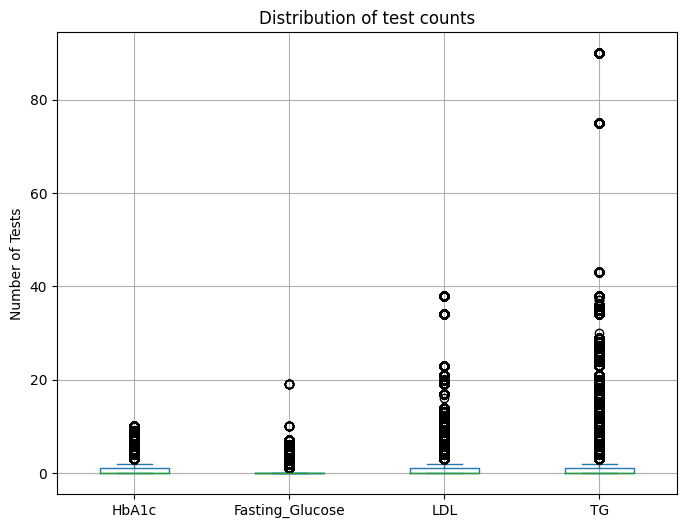

In [66]:
import matplotlib.pyplot as plt

count_cols = ['Num_HBA1C_results', 'Num_Fasting_glucode_results', 'Num_LDL_results', 'Num_TG_results']
labels = ['HbA1c', 'Fasting_Glucose', 'LDL', 'TG']

'''data_combined[count_cols].plot(kind = 'bar' , figsize=(12,6), width=0.8)

plt.title('Number of Tests per Patient')
plt.xlabel('patient Index')
plt.ylabel('Number of tests')

plt.xticks(rotation=0)
plt.legend(labels=labels)
plt.tight_layout()

plt.show()'''

data_combined [count_cols].plot(kind='box', figsize=(8,6))
plt.title('Distribution of test counts')
plt.ylabel('Number of Tests')
plt.xticks([1,2,3,4], labels)
plt.grid(True)
plt.show()

In [82]:
def has_high_num(num): 
    return (
        num['Num_HBA1C_results'] >=1 and
        num['Num_Fasting_glucode_results'] >= 1 and
        num['Num_LDL_results'] >= 1 and
        num['Num_TG_results'] >=1)
high_num_row=pd.DataFrame()
count_cols = ['Num_HBA1C_results', 'Num_Fasting_glucode_results', 'Num_LDL_results', 'Num_TG_results']
labels = ['HBA1C_results', 'GLUCOSE FASTING_results', 'LDL-CHOLESTEROL_results', 'TRIGLYCERIDES_results']

'''for i in range (0,len(count_cols),1):
    high_num_rows = data_combined[data_combined[count_cols[i]].apply(has_high_num)]
    print(high_num_rows[[count_cols[i], labels[i]] ])'''
high_num_rows = data_combined[data_combined.apply(has_high_num, axis=1)]

In [83]:
high_num_rows

,Patient ID,HBA1C_name,HBA1C_results,GLUCOSE FASTING_name,GLUCOSE FASTING_results,LDL-CHOLESTEROL_name,LDL-CHOLESTEROL_results,TRIGLYCERIDES_name,TRIGLYCERIDES_results,Diabetic_status,diabetic_diagnosis_date,Diagnosis Code (ICD10),Diagnosis Date,Gender,Date of Birth,Num_HBA1C_results,Num_Fasting_glucode_results,Num_LDL_results,Num_TG_results
44,000b2a238717215130d6,HBA1C,"[(2018-09-20, 5.5), (2021-02-14, 6.1), (2021-0...",GLUCOSE FASTING,"[(2018-09-20, 5.6)]",LDL-CHOLESTEROL,"[(2018-09-20, 3.74), (2021-02-14, 2.09)]",TRIGLYCERIDES,"[(2018-09-20, 1.18), (2021-02-14, 1.12)]",Non-diabetic,NaT,C187,2021-02-14,NaN,NaN,3,1,2,2
45,000b2a238717215130d6,HBA1C,"[(2018-09-20, 5.5), (2021-02-14, 6.1), (2021-0...",GLUCOSE FASTING,"[(2018-09-20, 5.6)]",LDL-CHOLESTEROL,"[(2018-09-20, 3.74), (2021-02-14, 2.09)]",TRIGLYCERIDES,"[(2018-09-20, 1.18), (2021-02-14, 1.12)]",Non-diabetic,NaT,D509,2021-02-14,NaN,NaN,3,1,2,2
46,000b2a238717215130d6,HBA1C,"[(2018-09-20, 5.5), (2021-02-14, 6.1), (2021-0...",GLUCOSE FASTING,"[(2018-09-20, 5.6)]",LDL-CHOLESTEROL,"[(2018-09-20, 3.74), (2021-02-14, 2.09)]",TRIGLYCERIDES,"[(2018-09-20, 1.18), (2021-02-14, 1.12)]",Non-diabetic,NaT,I951,2021-02-14,NaN,NaN,3,1,2,2
47,000b2a238717215130d6,HBA1C,"[(2018-09-20, 5.5), (2021-02-14, 6.1), (2021-0...",GLUCOSE FASTING,"[(2018-09-20, 5.6)]",LDL-CHOLESTEROL,"[(2018-09-20, 3.74), (2021-02-14, 2.09)]",TRIGLYCERIDES,"[(2018-09-20, 1.18), (2021-02-14, 1.12)]",Non-diabetic,NaT,M545,2021-02-14,NaN,NaN,3,1,2,2
48,000b2a238717215130d6,HBA1C,"[(2018-09-20, 5.5), (2021-02-14, 6.1), (2021-0...",GLUCOSE FASTING,"[(2018-09-20, 5.6)]",LDL-CHOLESTEROL,"[(2018-09-20, 3.74), (2021-02-14, 2.09)]",TRIGLYCERIDES,"[(2018-09-20, 1.18), (2021-02-14, 1.12)]",Non-diabetic,NaT,M80003,2021-02-14,NaN,NaN,3,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394426,fff33adfcd0414d611e8,HBA1C,"[(2018-06-10, 5.9)]",GLUCOSE FASTING,"[(2018-06-10, 6.2)]",LDL-CHOLESTEROL,"[(2018-06-10, 5.48)]",TRIGLYCERIDES,"[(2018-06-10, 1.19)]",Non-diabetic,NaT,I639,2018-06-20,NaN,NaN,1,1,1,1
3394427,fff33adfcd0414d611e8,HBA1C,"[(2018-06-10, 5.9)]",GLUCOSE FASTING,"[(2018-06-10, 6.2)]",LDL-CHOLESTEROL,"[(2018-06-10, 5.48)]",TRIGLYCERIDES,"[(2018-06-10, 1.19)]",Non-diabetic,NaT,N879,2018-06-20,NaN,NaN,1,1,1,1
3394428,fff33adfcd0414d611e8,HBA1C,"[(2018-06-10, 5.9)]",GLUCOSE FASTING,"[(2018-06-10, 6.2)]",LDL-CHOLESTEROL,"[(2018-06-10, 5.48)]",TRIGLYCERIDES,"[(2018-06-10, 1.19)]",Non-diabetic,NaT,N920,2018-06-20,NaN,NaN,1,1,1,1
3394429,fff33adfcd0414d611e8,HBA1C,"[(2018-06-10, 5.9)]",GLUCOSE FASTING,"[(2018-06-10, 6.2)]",LDL-CHOLESTEROL,"[(2018-06-10, 5.48)]",TRIGLYCERIDES,"[(2018-06-10, 1.19)]",Non-diabetic,NaT,0003562000,2018-06-12,NaN,NaN,1,1,1,1


In [ ]:
cases_data = data_combined[~data_combined['Diagnosis Code (ICD10)'].isna()].copy()
control_data = data_combined[data_combined['Diagnosis Code (ICD10)'].isna()].copy()

In [ ]:
cases_data

In [ ]:
control_data

# check if there are sufficent test results in cases_data

In [ ]:
'''from dateutil.relativedelta import relativedelta
from datetime import datetime'''

In [ ]:
'''cases_data['Diagnosis Date'] = pd.to_datetime(cases_data['Diagnosis Date'])

def check_min_values(row, result_columns, min_count=5, years_before=1):
    cutoff = row['Diagnosis Date']- relativedelta(years=years_before)
    
    for col in result_columns:
        result_list = row[col]
        
        if not isinstance(result_list, list):
            return False
        try:
           valid_values = [val for (dt,val) in result_list if pd.to_datetime(dt) <= cutoff]
        except Exception as e:
            print(f"Error processing row: {e}")
            return False
            
        if len(valid_values) < min_count:
            return False
    return True
        

result_columns = ['HBA1C_results','GLUCOSE FASTING_results', 'LDL-CHOLESTEROL_results', 'TRIGLYCERIDES_results' ]
cases_data['meets_criteria'] = cases_data.apply(lambda row: check_min_values(row, result_columns), axis=1)

if (cases_data['meets_criteria']==True):
    print("present")'''

In [ ]:

diag_data = pd.read_pickle('/home/jovyan/elpha-data/outputs/diagnosis(2).pkl')